In [1]:
!pip install ar_wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import re
import string
from wordcloud import WordCloud
from ar_wordcloud import ArabicWordCloud
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from collections import Counter
from nltk import ngrams


In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df1 = pd.read_csv('/content/stories_art-et-culture.csv', encoding='utf8')
df2 = pd.read_csv('/content/stories_economie.csv', encoding='utf8')
df3= pd.read_csv("/content/stories_faits-divers.csv", encoding='utf8')
df4 = pd.read_csv('/content/stories_marocains-du-monde.csv', encoding='utf8')
df5 = pd.read_csv('/content/stories_medias.csv', encoding='utf8')
df6 = pd.read_csv('/content/stories_orbites.csv', encoding='utf8')
df7 = pd.read_csv('/content/stories_politique.csv', encoding='utf8')
df8 = pd.read_csv('/content/stories_societe.csv', encoding='utf8')
df9 = pd.read_csv('/content/stories_sport.csv', encoding='utf8')
df10 = pd.read_csv('/content/stories_tamazight.csv', encoding='utf8')
df11= pd.read_csv('/content/stories_regions.csv', encoding='utf8')



In [8]:
Herspress_Stories = pd.concat([df1, df2, df3,df4,df5,df6,df7,df8,df9,df10,df11])

In [9]:
Herspress_Stories

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture
...,...,...,...,...,...,...,...
995,995,db1852c004e411eba14e646e69d991ea,تفاصيل الحالة الوبائية بجهة درعة - تافيلالت,السبت 08 غشت 2020 - 05:21,محمد ايت حساين من ورزازات,كشفت المديرية الجهوية لوزارة الصحة بجهة درعة ت...,regions
996,996,dbb3a93a04e411ebb651646e69d991ea,توقعات أحوال الطقس اليوم السبت في المغرب,السبت 08 غشت 2020 - 04:29,هسبريس من الرباط,تتوقع المديرية العامة للأرصاد الجوية، اليوم ال...,regions
997,997,dce9e49004e411eb829f646e69d991ea,أسطول النقل المدرسي في وزان يتعزز بـ14 سيارة ‬,السبت 08 غشت 2020 - 03:33,هسبريس من وزان,في إطار دعم وتشجيع التمدرس بالجماعات الترابية ...,regions
998,998,dda67eda04e411eb8d99646e69d991ea,لجنة اليقظة تغلق الحدائق والمنتزهات بمراكش,السبت 08 غشت 2020 - 01:05,إبراهيم مغراوي من مراكش,أدى الارتفاع المهول في الحالات النشطة على مستو...,regions


In [10]:
Herspress_Stories = Herspress_Stories.drop('Unnamed: 0', axis=1)

In [11]:
Herspress_Stories

,id,title,date,author,story,topic
0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture
...,...,...,...,...,...,...
995,db1852c004e411eba14e646e69d991ea,تفاصيل الحالة الوبائية بجهة درعة - تافيلالت,السبت 08 غشت 2020 - 05:21,محمد ايت حساين من ورزازات,كشفت المديرية الجهوية لوزارة الصحة بجهة درعة ت...,regions
996,dbb3a93a04e411ebb651646e69d991ea,توقعات أحوال الطقس اليوم السبت في المغرب,السبت 08 غشت 2020 - 04:29,هسبريس من الرباط,تتوقع المديرية العامة للأرصاد الجوية، اليوم ال...,regions
997,dce9e49004e411eb829f646e69d991ea,أسطول النقل المدرسي في وزان يتعزز بـ14 سيارة ‬,السبت 08 غشت 2020 - 03:33,هسبريس من وزان,في إطار دعم وتشجيع التمدرس بالجماعات الترابية ...,regions
998,dda67eda04e411eb8d99646e69d991ea,لجنة اليقظة تغلق الحدائق والمنتزهات بمراكش,السبت 08 غشت 2020 - 01:05,إبراهيم مغراوي من مراكش,أدى الارتفاع المهول في الحالات النشطة على مستو...,regions


In [12]:
Herspress_Stories.story

0      وجه "بيت الشعر في المغرب" إلى وزير الثقافة وال...
1      في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...
2      تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...
3      مِن قَلب أيّام "الحَجْر"، رأتِ النّورَ الفصول ...
4      أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...
                             ...                        
995    كشفت المديرية الجهوية لوزارة الصحة بجهة درعة ت...
996    تتوقع المديرية العامة للأرصاد الجوية، اليوم ال...
997    في إطار دعم وتشجيع التمدرس بالجماعات الترابية ...
998    أدى الارتفاع المهول في الحالات النشطة على مستو...
999    ملامح مكدّرة ترتسم على وجوه تقاسي المحن، وجدت ...
Name: story, Length: 11000, dtype: object

In [13]:
Herspress_Stories = Herspress_Stories.sample(frac=1).reset_index(drop=True)
Herspress_Stories

,id,title,date,author,story,topic
0,944a0bb4055711ebb1b9646e69d991ea,الـLADH تطالبُ بتعميم الأمازيغية في التعليم,الخميس 05 فبراير 2015 - 07:05,هسبريس من الرباط,طالبت العصبة الأمازيغية لحقوق الإنسان الحكومةَ...,tamazight
1,69191450055911eba7b7646e69d991ea,الملك محمد السادس يدعم لبنان بمساعدات إنسانية,الخميس 06 غشت 2020 - 14:00,هسبريس من الرباط,أعلنت سفارة المملكة المغربية بلبنان أنه تنفيذا...,orbites
2,b931c0c004e511ebb91d646e69d991ea,"الملك: أستشعر جسامة الرزء الفادح بمقتل ""عدنان""",الاثنين 14 شتنبر 2020 - 19:45,هسبريس من الرباط,بعث الملك محمد السادس برقية تعزية ومواساة إلى ...,societe
3,d1d10fd204f111eba0d8646e69d991ea,"شراكة تطلق جامعة ربيعية جديدة لـ""شبيبة الجالية""",الثلاثاء 26 مارس 2019 - 12:15,هسبريس من الرباط,وقّع عبد الكريم بنعتيق، الوزير المنتدب المكلف ...,marocains-du-monde
4,b88ae37804e211eb8a6d646e69d991ea,"سلطات ورزازات تشدد الإجراءات أمام ""كوفيد-19""",السبت 05 شتنبر 2020 - 10:50,محمد ايت حساين,في إطار التدابير الوقائية المتخذة لمواجهة الوض...,regions
...,...,...,...,...,...,...
10995,46776410055011eb892b646e69d991ea,"بركات يفضح سر درويش الدفين .. ابنة من ""علاقة غ...",السبت 13 يونيو 2020 - 06:50,محمد سعيد احجيوج*,أخرج سليم بركات من عزلته الممتدة منذ عقدين في ...,art-et-culture
10996,2f08f906055811eb9ef6646e69d991ea,"بويخف: الملكُ حسمَ في حرف ""تيفناغ"" واستصعابه ع...",الاثنين 17 فبراير 2014 - 10:12,حاوره محمد بلقاسم,تزامنًا مع خروج حزب الاستقلال بمقترح يثير مرة ...,tamazight
10997,92bb85fa055611eba382646e69d991ea,جمعويون يطالبون بحماية وتنمية الأمازيغية في ال...,الأحد 19 يونيو 2016 - 09:00,هسبريس – محمد الراجي,بعد عشر سنوات على إدماج اللغة الأمازيغية في ال...,tamazight
10998,7f1a0a80055c11eb80c6646e69d991ea,"""رالي داكار"" يتجاهل تهديدات البوليساريو ويشق ا...",الثلاثاء 07 يناير 2020 - 21:00,هسبريس من الرباط,"دون فاعلية تذكر، لم تستطع كل ""البروباغوندا"" ال...",orbites


#**Task2 - EDA**

In [14]:
def removenonrabic(txt):
  # Remove None arabic 
  without_english = re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", txt)
  return without_english

def removetashkeel(txt):
  TATWEEL = u"\u0640"
  p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
  without_tashkeel = re.sub(p_tashkeel,"", txt)
  without_tashkeel=without_tashkeel.replace(TATWEEL, '')
  return without_tashkeel

def removepuncatution(txt):

  punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
  translator = str.maketrans('', '', punctuations)
  without_punc = txt.translate(translator)

  return without_punc

def removeDigits(txt):
  without_digit = re.sub('[0-9]+', '', txt) 
  return without_digit

def removeURl(txt):
  without_url= re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', txt)
  return without_url

In [15]:

def Clean_text(raw_text):

  raw_text=raw_text.strip()


  #1 remove digits
  text= removeDigits(raw_text)

  #2 remove the puncatution from the text 
  text=removepuncatution(text)

  #3 remove arabic tashkeel from the text
  text=removetashkeel(text)

  #4 remove url and links from the text
  text=removeURl(text)

  #5 remove non rabic words from the text
  text=removenonrabic(text)

  return text

In [16]:
# clean = {
#     'story': Herspress_Stories['story'].apply(lambda x: Clean_text(str(x)))
#     }
# Cleaned_data = pd.DataFrame.from_dict(clean)
# Cleaned_data


In [17]:
Herspress_Stories['story']=Herspress_Stories['story'].apply(lambda x: Clean_text(str(x)))
Herspress_Stories

,id,title,date,author,story,topic
0,944a0bb4055711ebb1b9646e69d991ea,الـLADH تطالبُ بتعميم الأمازيغية في التعليم,الخميس 05 فبراير 2015 - 07:05,هسبريس من الرباط,طالبت العصبة الأمازيغية لحقوق الإنسان الحكومة ...,tamazight
1,69191450055911eba7b7646e69d991ea,الملك محمد السادس يدعم لبنان بمساعدات إنسانية,الخميس 06 غشت 2020 - 14:00,هسبريس من الرباط,أعلنت سفارة المملكة المغربية بلبنان أنه تنفيذا...,orbites
2,b931c0c004e511ebb91d646e69d991ea,"الملك: أستشعر جسامة الرزء الفادح بمقتل ""عدنان""",الاثنين 14 شتنبر 2020 - 19:45,هسبريس من الرباط,بعث الملك محمد السادس برقية تعزية ومواساة إلى ...,societe
3,d1d10fd204f111eba0d8646e69d991ea,"شراكة تطلق جامعة ربيعية جديدة لـ""شبيبة الجالية""",الثلاثاء 26 مارس 2019 - 12:15,هسبريس من الرباط,وقع عبد الكريم بنعتيق الوزير المنتدب المكلف با...,marocains-du-monde
4,b88ae37804e211eb8a6d646e69d991ea,"سلطات ورزازات تشدد الإجراءات أمام ""كوفيد-19""",السبت 05 شتنبر 2020 - 10:50,محمد ايت حساين,في إطار التدابير الوقائية المتخذة لمواجهة الوض...,regions
...,...,...,...,...,...,...
10995,46776410055011eb892b646e69d991ea,"بركات يفضح سر درويش الدفين .. ابنة من ""علاقة غ...",السبت 13 يونيو 2020 - 06:50,محمد سعيد احجيوج*,أخرج سليم بركات من عزلته الممتدة منذ عقدين في ...,art-et-culture
10996,2f08f906055811eb9ef6646e69d991ea,"بويخف: الملكُ حسمَ في حرف ""تيفناغ"" واستصعابه ع...",الاثنين 17 فبراير 2014 - 10:12,حاوره محمد بلقاسم,تزامنا مع خروج حزب الاستقلال بمقترح يثير مرة أ...,tamazight
10997,92bb85fa055611eba382646e69d991ea,جمعويون يطالبون بحماية وتنمية الأمازيغية في ال...,الأحد 19 يونيو 2016 - 09:00,هسبريس – محمد الراجي,بعد عشر سنوات على إدماج اللغة الأمازيغية في ال...,tamazight
10998,7f1a0a80055c11eb80c6646e69d991ea,"""رالي داكار"" يتجاهل تهديدات البوليساريو ويشق ا...",الثلاثاء 07 يناير 2020 - 21:00,هسبريس من الرباط,دون فاعلية تذكر لم تستطع كل البروباغوندا التي ...,orbites


In [18]:
def get_stopwords_list(stop_file_path):

    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(stop_set)

In [19]:
stopwords_path = "/content/stopwords.txt"
stopwords = get_stopwords_list(stopwords_path)


### **Number of examples per class**

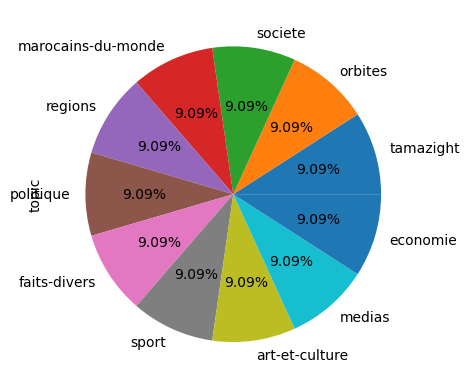

In [20]:
Herspress_Stories['topic'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

### **Wordcloud for top words per topic**

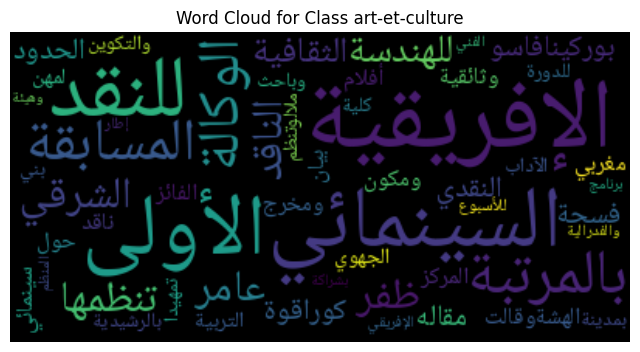

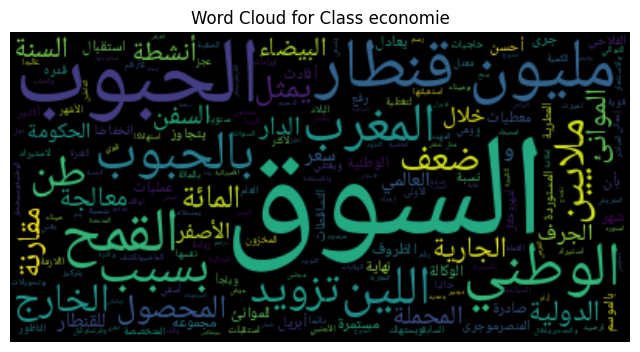

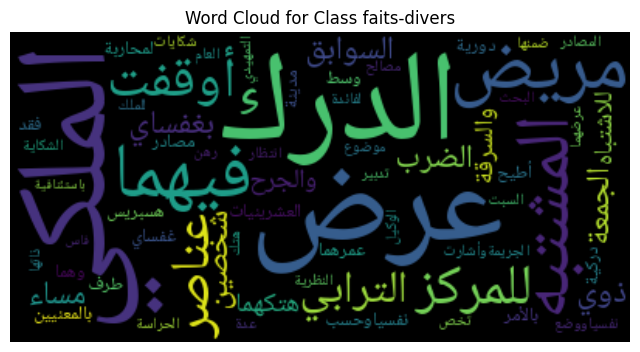

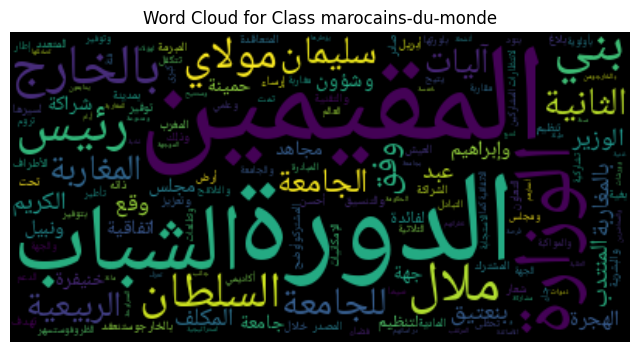

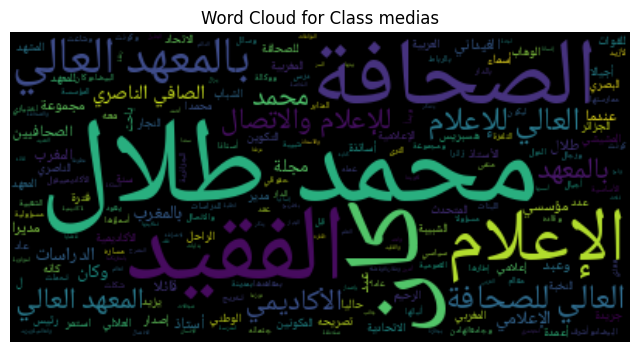

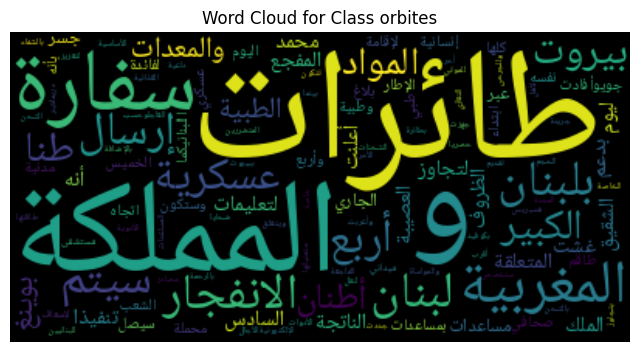

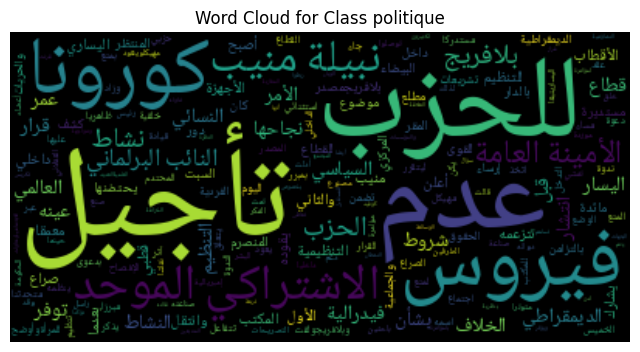

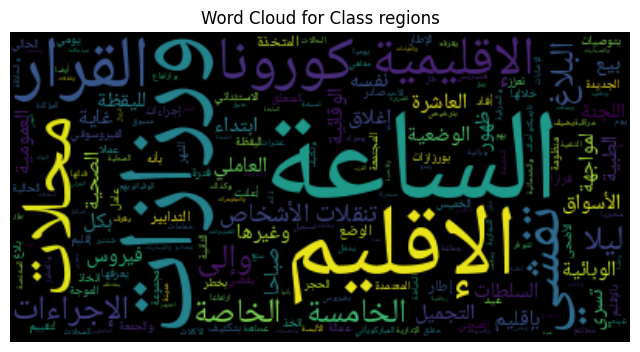

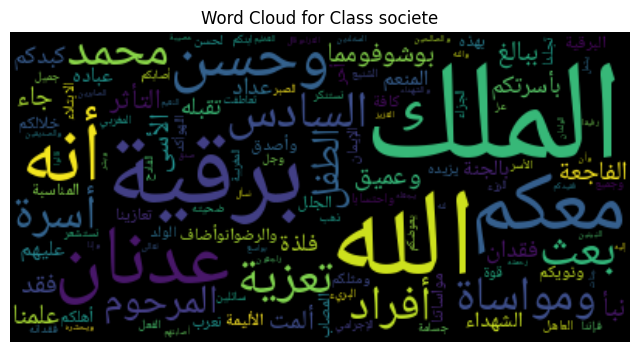

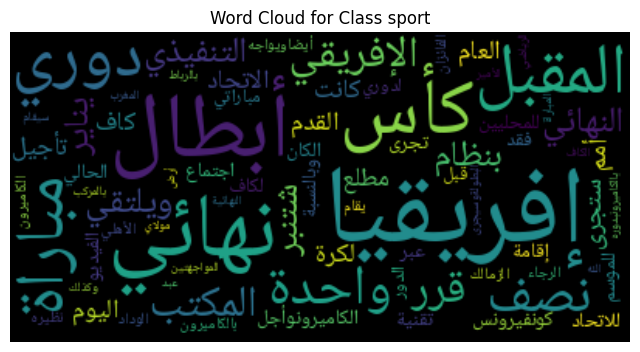

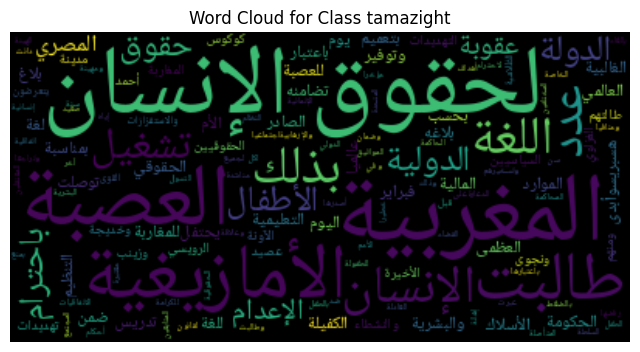

In [21]:
grouped = Herspress_Stories.groupby('topic')

# Iterate over each group
for class_label, group in grouped:
    # Concatenate the text data for the current class
    words = group['story'].apply(nltk.word_tokenize)
    topic_words=words.values[0]
    filtered_words = [word for word in topic_words if word not in stopwords]
    text = ' '.join(filtered_words)
    # text_data = ' '.join(group['story'].tolist())

    # Perform any necessary preprocessing on the text_data
    
    # Create a WordCloud object
    awc = ArabicWordCloud()
    
    # Generate the word cloud
    wordcloud = awc.generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Class {class_label}')
    plt.axis('off')
    plt.show()

###**10 Top frequent 2 -gram generally**

In [22]:
# Tokanization the text data
def tokenization(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    return tokens

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(('مشيرا', 'إلى', 'أن'), ('الملك', 'محمد', 'السادس'), ('في', 'المائة', 'من'), ('لجريدة', 'هسبريس', 'الإلكترونية'), ('فيروس', 'كورونا', 'المستجد'), ('في', 'تصريح', 'لهسبريس'), ('تصريح', 'لجريدة', 'هسبريس'), ('في', 'تصريح', 'لجريدة'), ('بفيروس', 'كورونا', 'المستجد'), ('النيابة', 'العامة', 'المختصة'))
(1131, 1106, 855, 809, 797, 685, 676, 660, 590, 586)


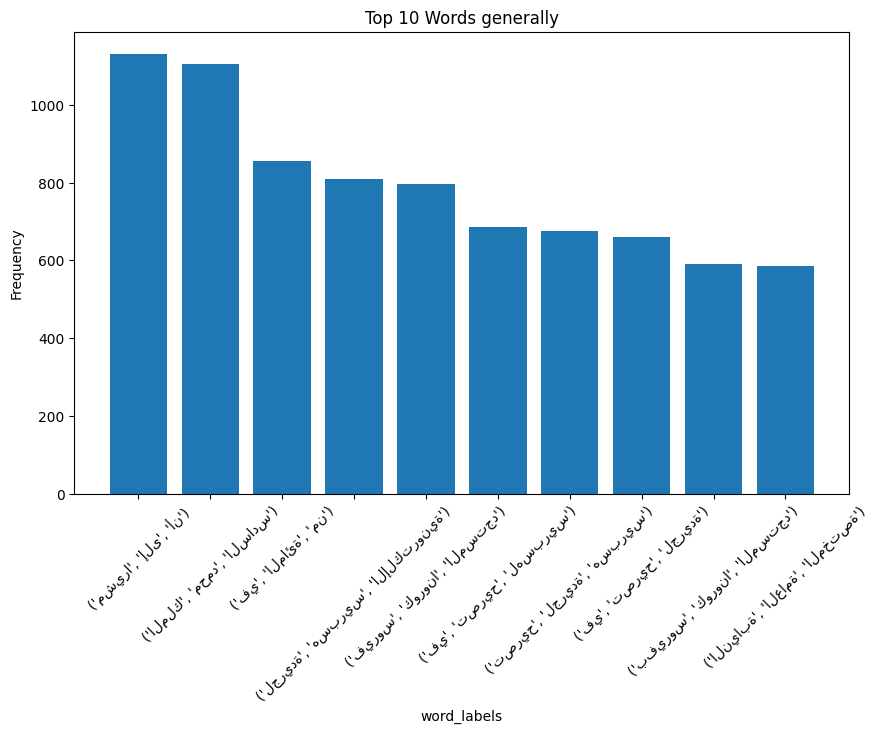

In [23]:

n=3

all_ngrams = Herspress_Stories['story'].apply(tokenization).apply(lambda x: list(ngrams(x, n)))

# Count the frequency of each 2-gram
all_ngrams_freq = Counter([gram for ngram_list in all_ngrams for gram in ngram_list])

print(all_ngrams_freq)
# Get  the top 10 most frequent words
top_words = all_ngrams_freq.most_common(10)


#Extract the word labels and counts
word_labels, word_counts = zip(*top_words)
print(word_labels)
print(word_counts)
word_labels = [str(label) for label in word_labels]
word_counts = list(word_counts)
# Plot the top words for the current class
plt.figure(figsize=(10, 6))
plt.bar(word_labels, word_counts)
plt.title(f'Top {10} Words generally')
plt.xlabel('word_labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### **10 Top frequent 1-gram per class**

('الإفريقية', 'السينمائي', 'الأولى', 'للنقد', 'بالمرتبة', 'المسابقة', 'الوكالة', 'ظفر', 'عامر', 'الشرقي')


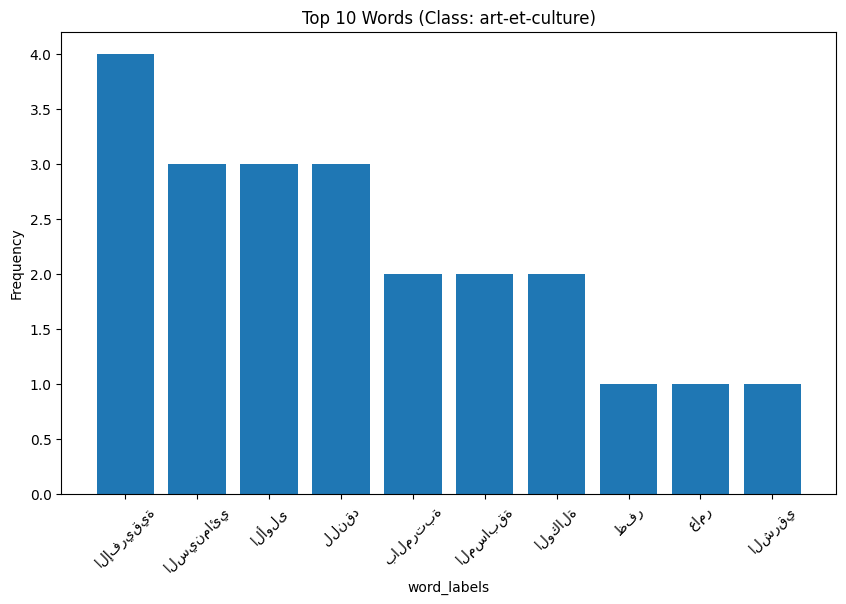

('السوق', 'الحبوب', 'مليون', 'قنطار', 'الوطني', 'القمح', 'بالحبوب', 'بسبب', 'المغرب', 'اللين')


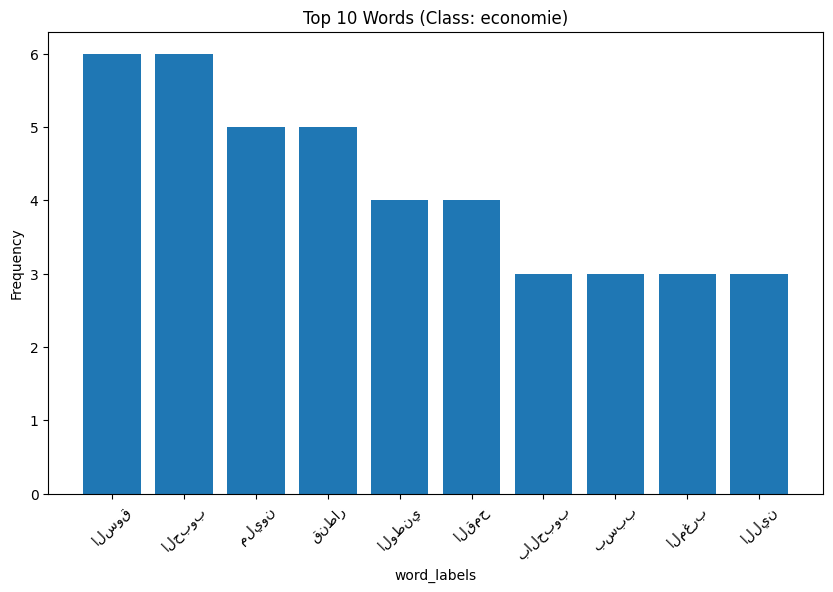

('الدرك', 'الملكي', 'عرض', 'مريض', 'المشتبه', 'فيهما', 'أوقفت', 'عناصر', 'للمركز', 'الترابي')


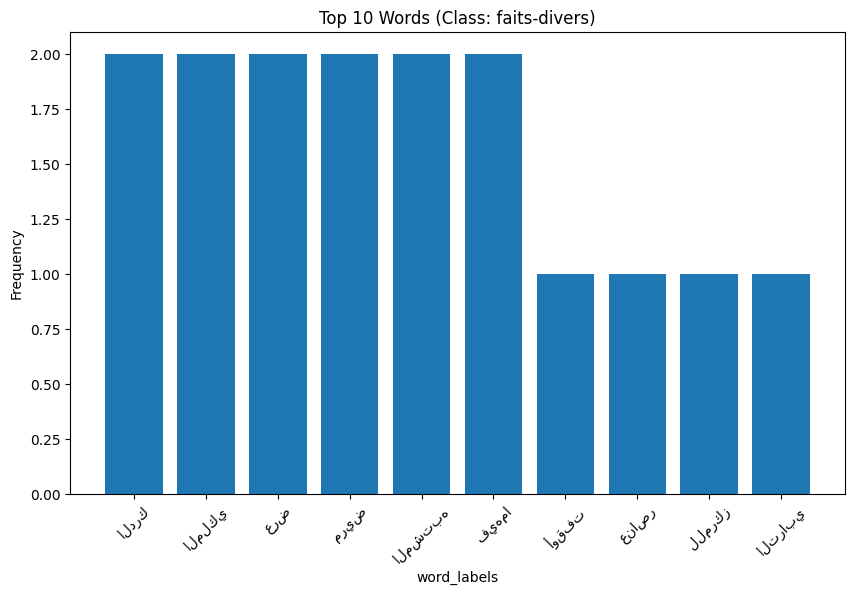

('المقيمين', 'الدورة', 'الشباب', 'الوزارة', 'بالخارج', 'رئيس', 'بني', 'ملال', 'السلطان', 'مولاي')


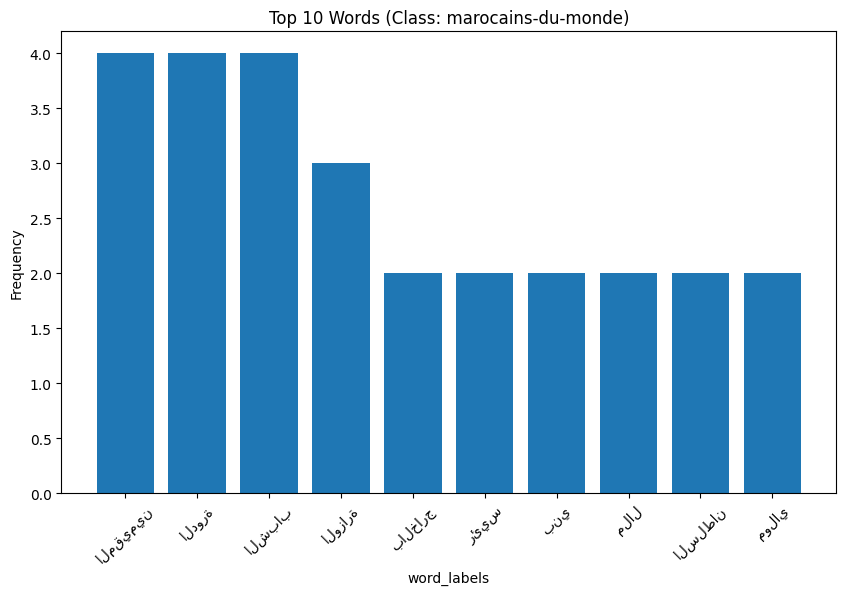

('محمد', 'طلال', 'العالي', 'بالمعهد', 'الفقيد', 'كان', 'للصحافة', 'المعهد', 'الصحافة', 'الناصري')


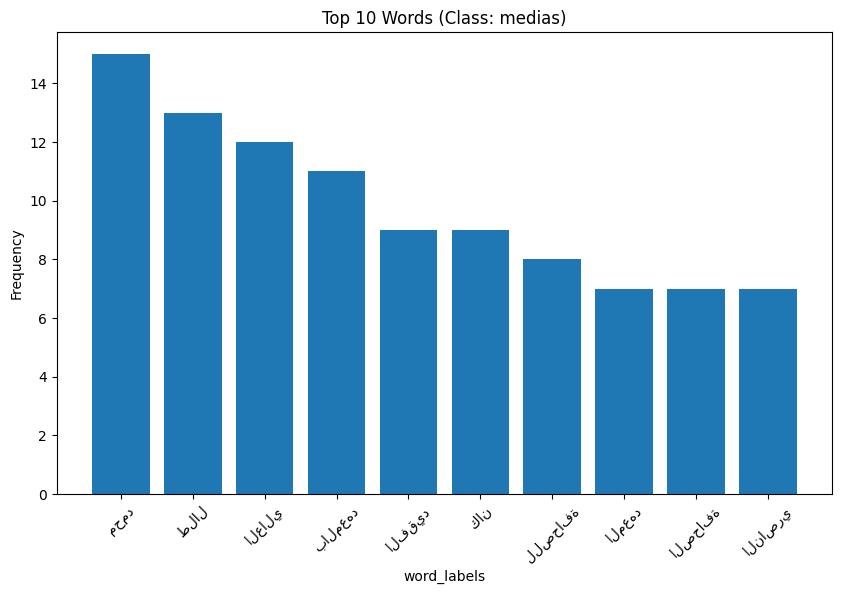

('طائرات', 'المملكة', 'و', 'سفارة', 'المغربية', 'بلبنان', 'لبنان', 'الانفجار', 'سيتم', 'إرسال')


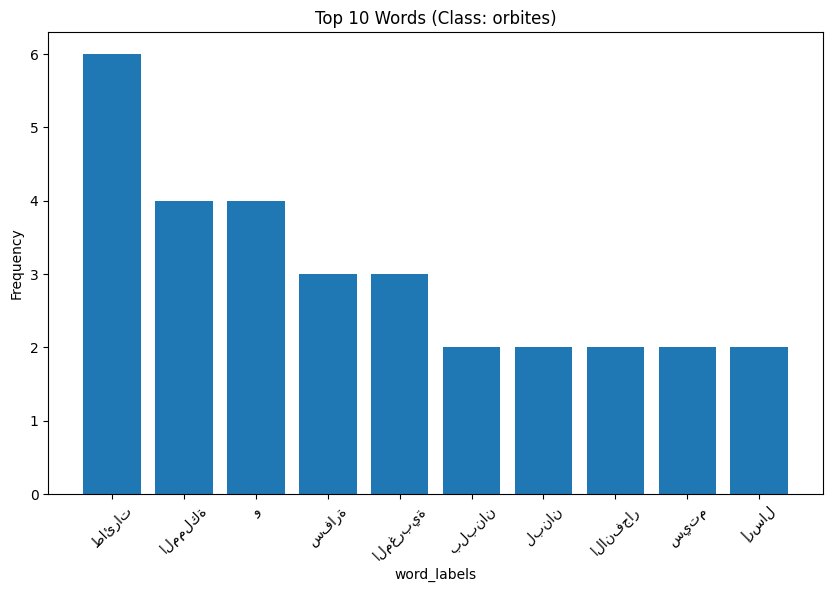

('منيب', 'تأجيل', 'الاشتراكي', 'الموحد', 'نبيلة', 'الأمينة', 'العامة', 'للحزب', 'عدم', 'فيروس')


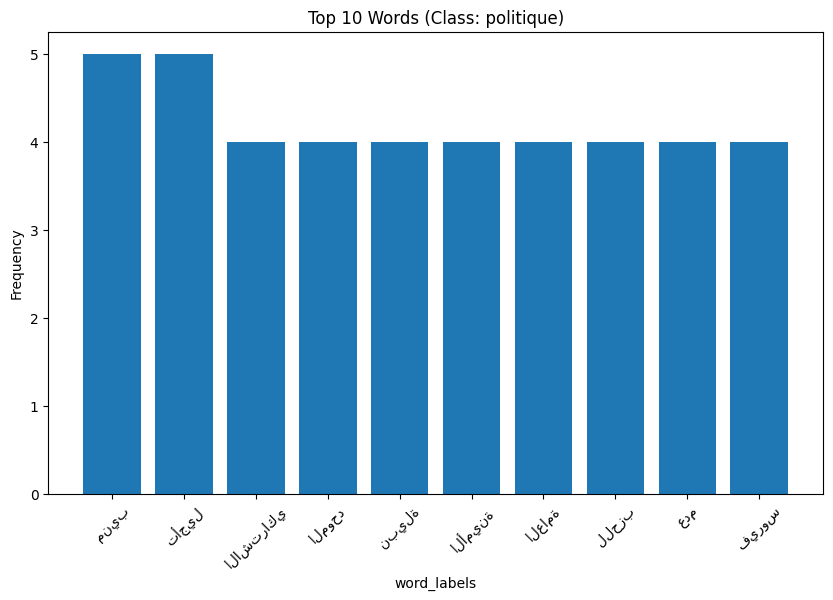

('الساعة', 'ورزازات', 'الإقليم', 'القرار', 'محلات', 'تفشي', 'كورونا', 'الإقليمية', 'الإجراءات', 'البلاغ')


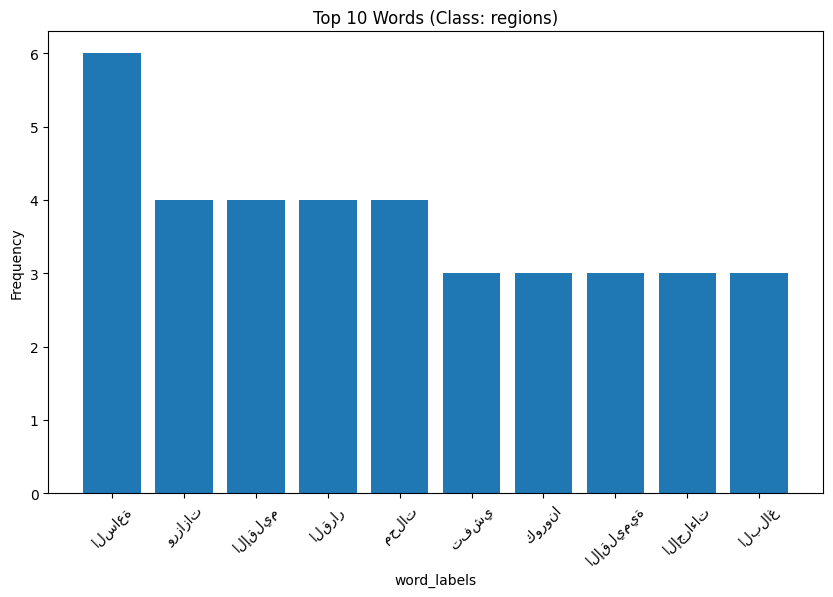

('الملك', 'الله', 'برقية', 'عدنان', 'أنه', 'معكم', 'وحسن', 'بعث', 'محمد', 'السادس')


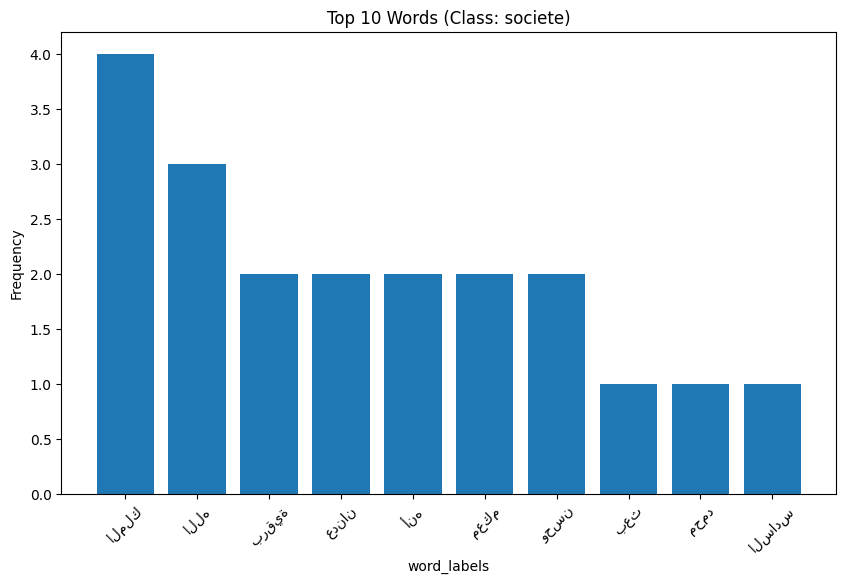

('إفريقيا', 'أبطال', 'نهائي', 'كأس', 'المقبل', 'دوري', 'مباراة', 'واحدة', 'نصف', 'قرر')


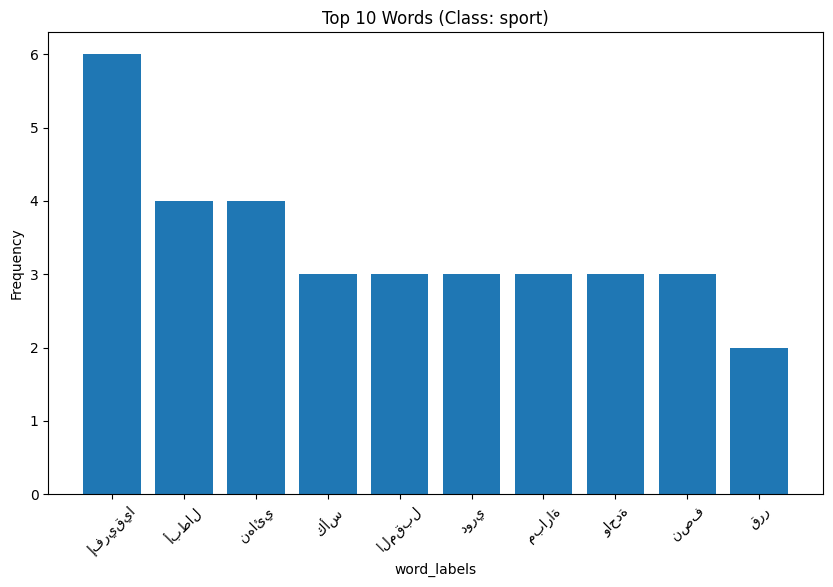

('الإنسان', 'لحقوق', 'المغربية', 'العصبة', 'الأمازيغية', 'طالبت', 'اللغة', 'بذلك', 'عدد', 'تشغيل')


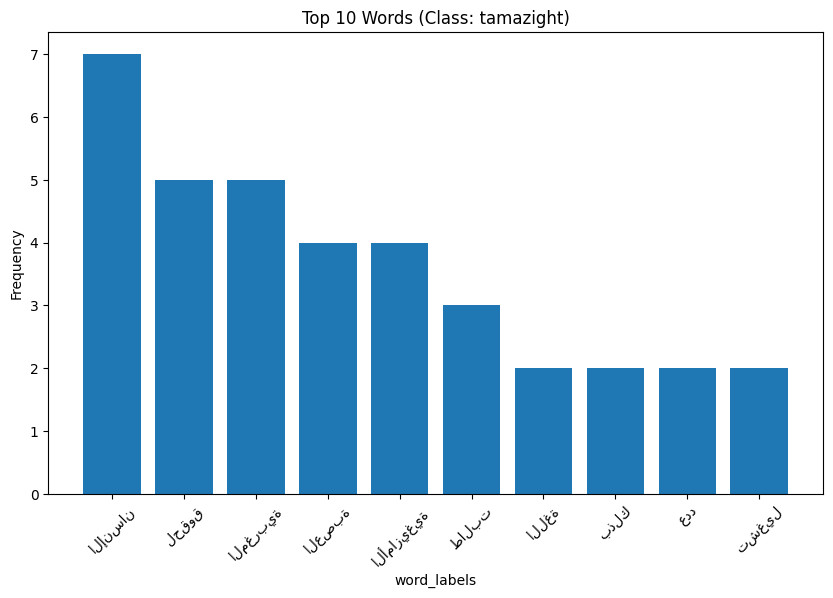

In [24]:


# Group the data by class labels
grouped = Herspress_Stories.groupby('topic')

# Define the number of top words to consider
top_n = 10

# Iterate over each class and plot the top words
for class_label, group in grouped:
    # Tokenize the text data for the current class


    words = group['story'].apply(nltk.word_tokenize)
    topic_words=words.values[0]
    tokens = [word for word in topic_words if word not in stopwords]
    
    # Count the frequency of each word within the class
    word_counts = Counter(tokens)
    
    # Get the top n most frequent words
    top_words = word_counts.most_common(top_n)

    
    #Extract the word labels and counts
    word_labels, word_counts = zip(*top_words)
    print(word_labels)
    # Plot the top words for the current class
    plt.figure(figsize=(10, 6))
    plt.bar(word_labels, word_counts)
    plt.title(f'Top {top_n} Words (Class: {class_label})')
    plt.xlabel('word_labels')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()



### **10 Top frequent 2 -gram per class**

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(('من', 'أجل'), ('إلى', 'أن'), ('من', 'خلال'), ('في', 'المائة'), ('وهو', 'ما'), ('من', 'طرف'), ('في', 'هذا'), ('فيروس', 'كورونا'), ('على', 'أن'), ('في', 'إطار'))
(5734, 5654, 3611, 3103, 2907, 2706, 2697, 2550, 2321, 2219)


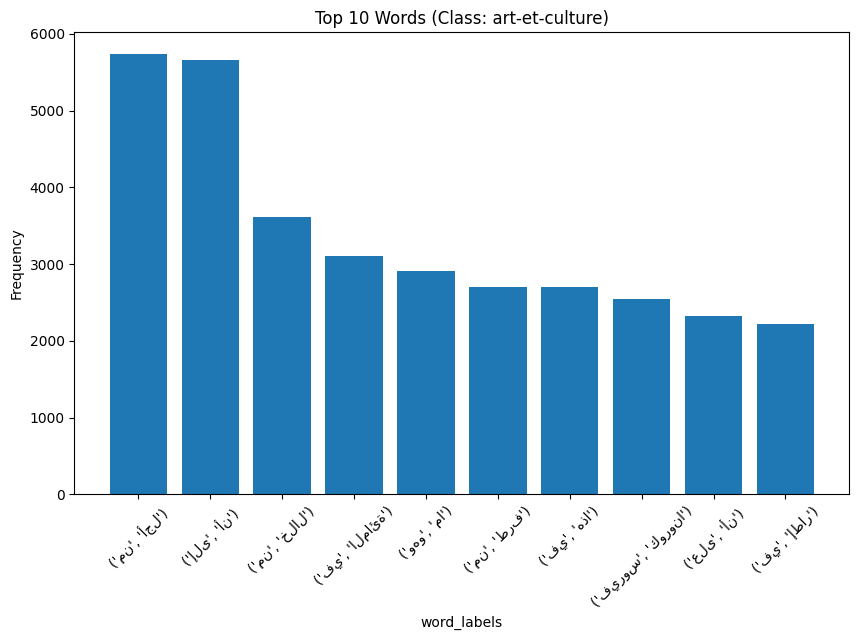

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(('من', 'أجل'), ('إلى', 'أن'), ('من', 'خلال'), ('في', 'المائة'), ('وهو', 'ما'), ('من', 'طرف'), ('في', 'هذا'), ('فيروس', 'كورونا'), ('على', 'أن'), ('في', 'إطار'))
(5734, 5654, 3611, 3103, 2907, 2706, 2697, 2550, 2321, 2219)


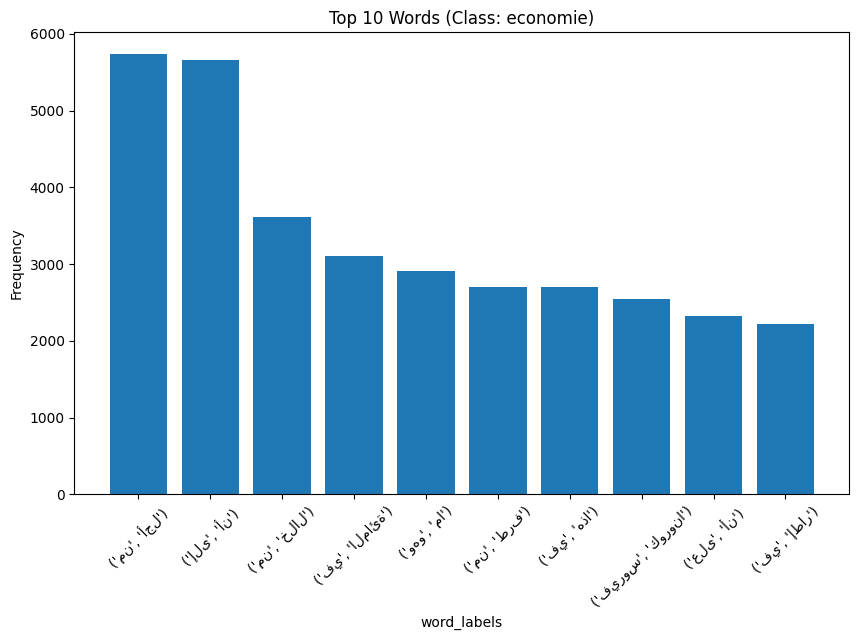

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(('من', 'أجل'), ('إلى', 'أن'), ('من', 'خلال'), ('في', 'المائة'), ('وهو', 'ما'), ('من', 'طرف'), ('في', 'هذا'), ('فيروس', 'كورونا'), ('على', 'أن'), ('في', 'إطار'))
(5734, 5654, 3611, 3103, 2907, 2706, 2697, 2550, 2321, 2219)


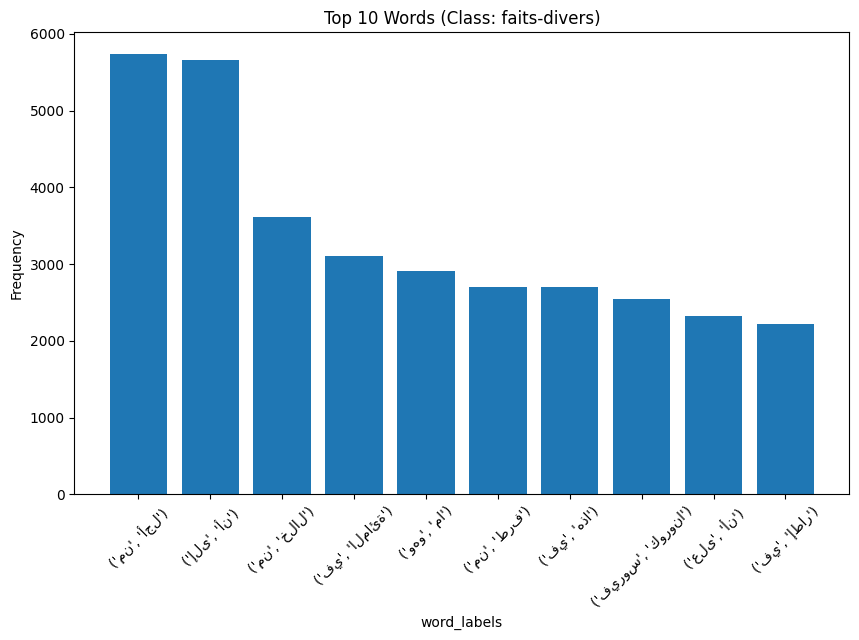

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(('من', 'أجل'), ('إلى', 'أن'), ('من', 'خلال'), ('في', 'المائة'), ('وهو', 'ما'), ('من', 'طرف'), ('في', 'هذا'), ('فيروس', 'كورونا'), ('على', 'أن'), ('في', 'إطار'))
(5734, 5654, 3611, 3103, 2907, 2706, 2697, 2550, 2321, 2219)


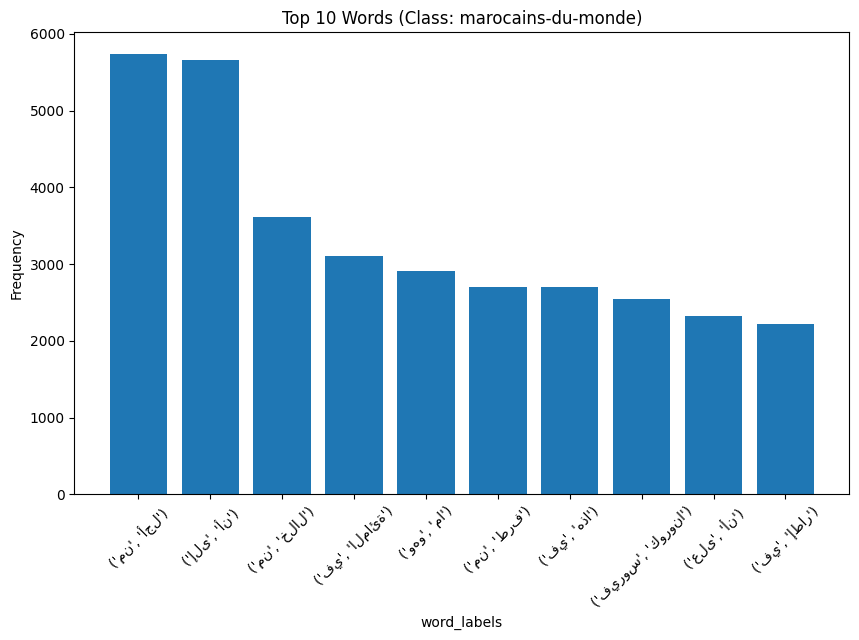

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(('من', 'أجل'), ('إلى', 'أن'), ('من', 'خلال'), ('في', 'المائة'), ('وهو', 'ما'), ('من', 'طرف'), ('في', 'هذا'), ('فيروس', 'كورونا'), ('على', 'أن'), ('في', 'إطار'))
(5734, 5654, 3611, 3103, 2907, 2706, 2697, 2550, 2321, 2219)


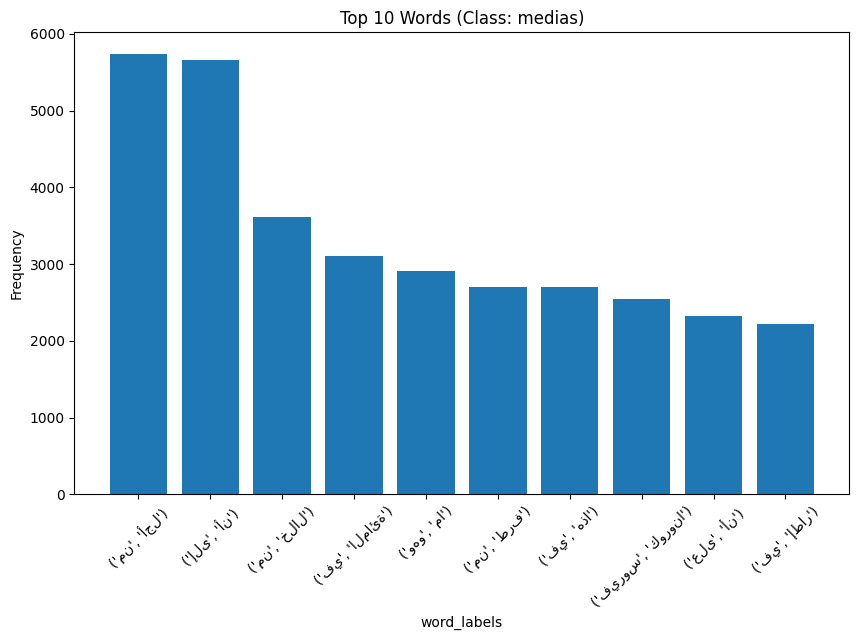

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(('من', 'أجل'), ('إلى', 'أن'), ('من', 'خلال'), ('في', 'المائة'), ('وهو', 'ما'), ('من', 'طرف'), ('في', 'هذا'), ('فيروس', 'كورونا'), ('على', 'أن'), ('في', 'إطار'))
(5734, 5654, 3611, 3103, 2907, 2706, 2697, 2550, 2321, 2219)


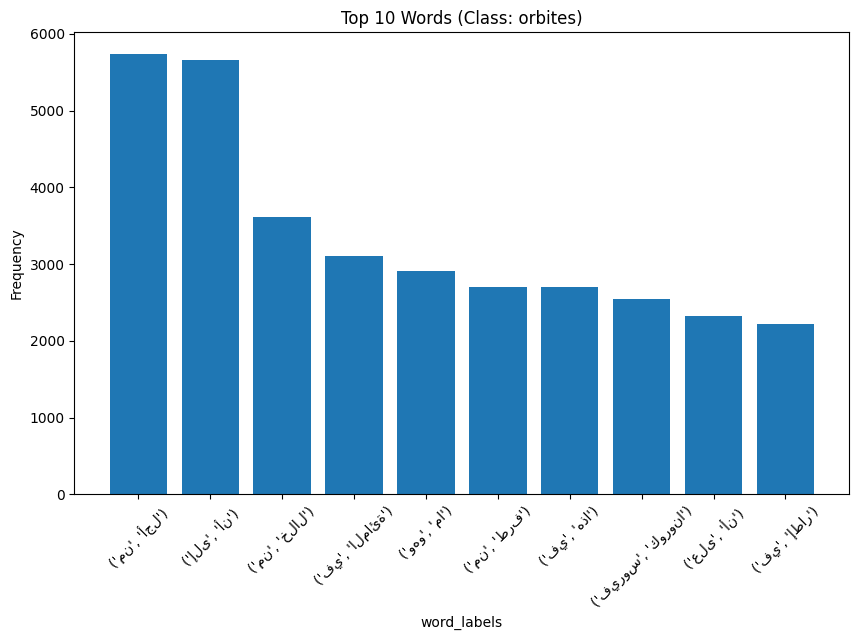

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(('من', 'أجل'), ('إلى', 'أن'), ('من', 'خلال'), ('في', 'المائة'), ('وهو', 'ما'), ('من', 'طرف'), ('في', 'هذا'), ('فيروس', 'كورونا'), ('على', 'أن'), ('في', 'إطار'))
(5734, 5654, 3611, 3103, 2907, 2706, 2697, 2550, 2321, 2219)


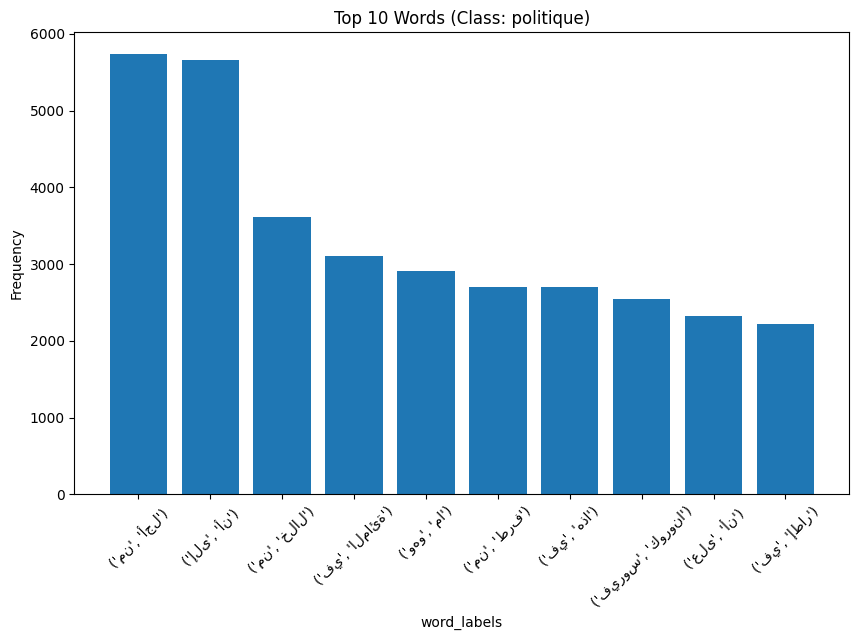

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(('من', 'أجل'), ('إلى', 'أن'), ('من', 'خلال'), ('في', 'المائة'), ('وهو', 'ما'), ('من', 'طرف'), ('في', 'هذا'), ('فيروس', 'كورونا'), ('على', 'أن'), ('في', 'إطار'))
(5734, 5654, 3611, 3103, 2907, 2706, 2697, 2550, 2321, 2219)


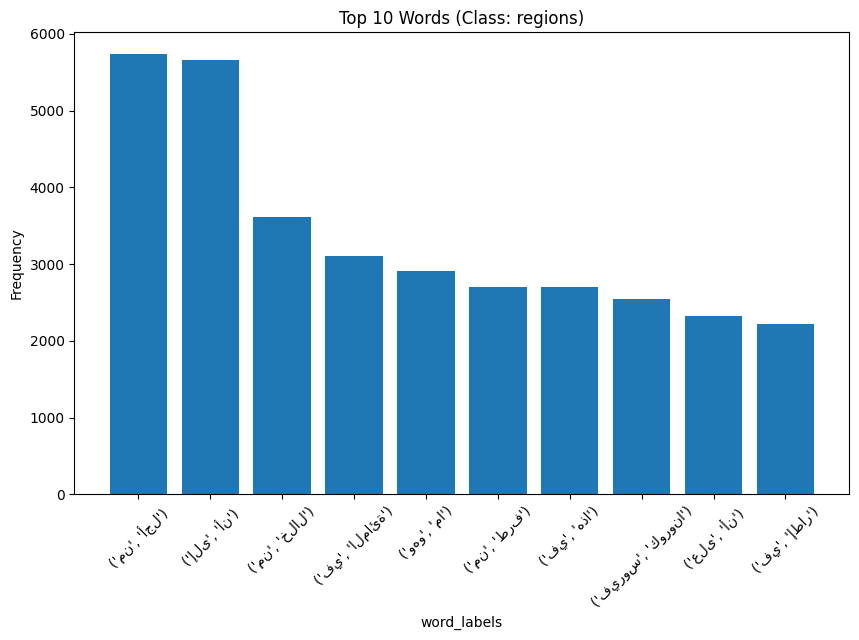

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(('من', 'أجل'), ('إلى', 'أن'), ('من', 'خلال'), ('في', 'المائة'), ('وهو', 'ما'), ('من', 'طرف'), ('في', 'هذا'), ('فيروس', 'كورونا'), ('على', 'أن'), ('في', 'إطار'))
(5734, 5654, 3611, 3103, 2907, 2706, 2697, 2550, 2321, 2219)


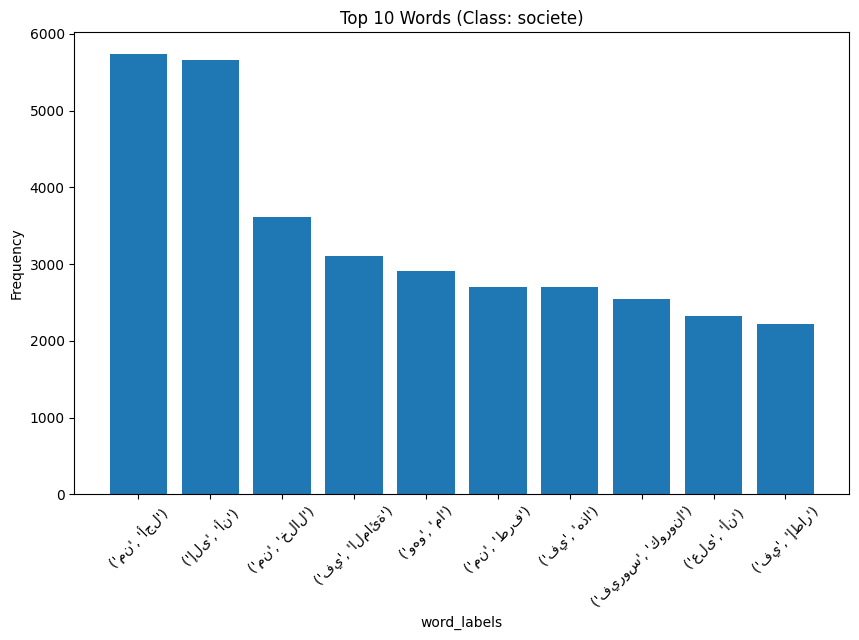

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(('من', 'أجل'), ('إلى', 'أن'), ('من', 'خلال'), ('في', 'المائة'), ('وهو', 'ما'), ('من', 'طرف'), ('في', 'هذا'), ('فيروس', 'كورونا'), ('على', 'أن'), ('في', 'إطار'))
(5734, 5654, 3611, 3103, 2907, 2706, 2697, 2550, 2321, 2219)


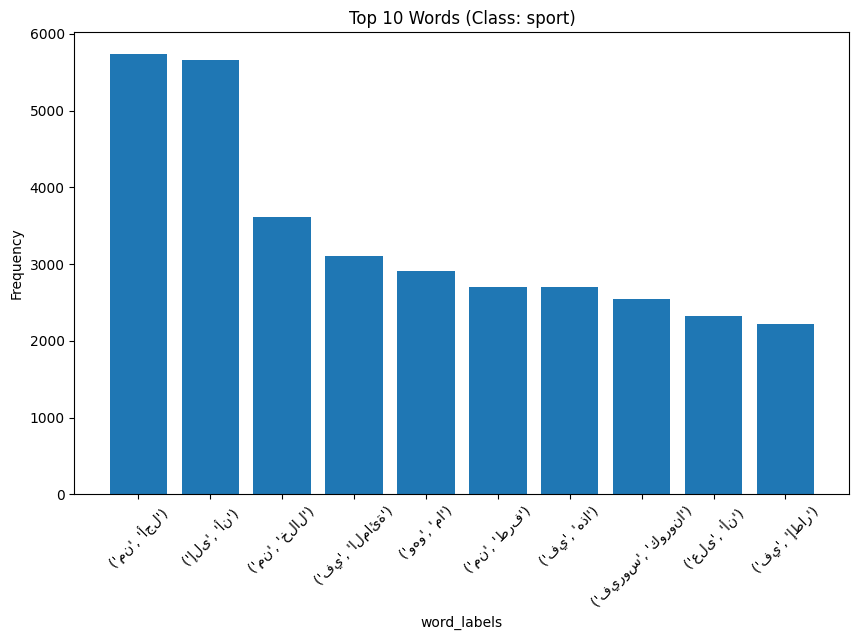

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(('من', 'أجل'), ('إلى', 'أن'), ('من', 'خلال'), ('في', 'المائة'), ('وهو', 'ما'), ('من', 'طرف'), ('في', 'هذا'), ('فيروس', 'كورونا'), ('على', 'أن'), ('في', 'إطار'))
(5734, 5654, 3611, 3103, 2907, 2706, 2697, 2550, 2321, 2219)


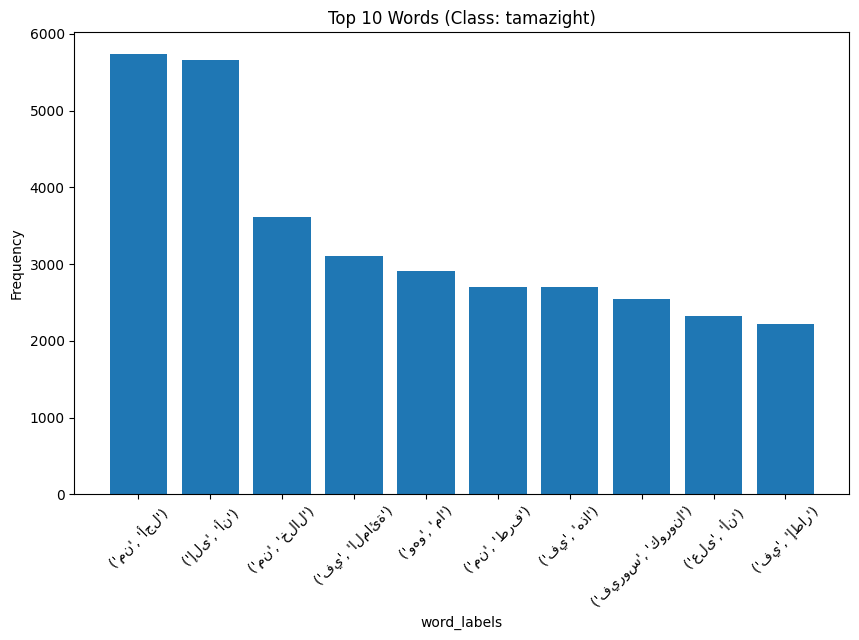

In [25]:


# Group the data by class labels
grouped = Herspress_Stories.groupby('topic')

# Define the number of top words to consider
top_n = 10
n=2

# Iterate over each class and plot the top words
for class_label, group in grouped:
    # Tokenize the text data for the current class
    all_ngrams = Herspress_Stories['story'].apply(tokenization).apply(lambda x: list(ngrams(x, n)))

    # Count the frequency of each 2-gram
    all_ngrams_freq = Counter([gram for ngram_list in all_ngrams for gram in ngram_list])

    print(all_ngrams_freq)
    # Get  the top 10 most frequent words
    top_words = all_ngrams_freq.most_common(10)

    
    #Extract the word labels and counts
    word_labels, word_counts = zip(*top_words)
    print(word_labels)
    print(word_counts)
    word_labels = [str(label) for label in word_labels]
    word_counts = list(word_counts)
    # Plot the top words for the current class
    plt.figure(figsize=(10, 6))
    plt.bar(word_labels, word_counts)
    plt.title(f'Top {top_n} Words (Class: {class_label})')
    plt.xlabel('word_labels')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()



###**Distribution of Word Lengths per Class**

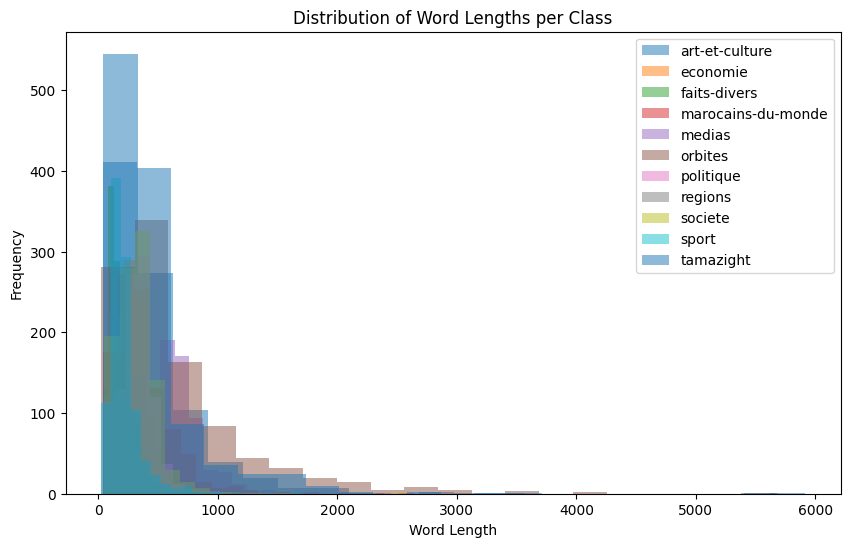

In [42]:


word_lengths_per_class = {}


for class_label, group in Herspress_Stories.groupby('topic'):
    
    word_lengths = group['story'].apply(lambda x: len(x.split()))

    word_lengths_per_class[class_label] = word_lengths

# Plot the distribution of word lengths for each class
plt.figure(figsize=(10, 6))
for class_label, word_lengths in word_lengths_per_class.items():
    plt.hist(word_lengths, bins=20, alpha=0.5, label=class_label)
plt.title('Distribution of Word Lengths per Class')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#**Task3 - Classification**

In [43]:
Herspress_Stories.to_csv('Herspress.csv',encoding="utf8")

In [44]:
Herspress_Stories

,id,title,date,author,story,topic
0,944a0bb4055711ebb1b9646e69d991ea,الـLADH تطالبُ بتعميم الأمازيغية في التعليم,الخميس 05 فبراير 2015 - 07:05,هسبريس من الرباط,طالبت العصبة الأمازيغية لحقوق الإنسان الحكومة ...,tamazight
1,69191450055911eba7b7646e69d991ea,الملك محمد السادس يدعم لبنان بمساعدات إنسانية,الخميس 06 غشت 2020 - 14:00,هسبريس من الرباط,أعلنت سفارة المملكة المغربية بلبنان أنه تنفيذا...,orbites
2,b931c0c004e511ebb91d646e69d991ea,"الملك: أستشعر جسامة الرزء الفادح بمقتل ""عدنان""",الاثنين 14 شتنبر 2020 - 19:45,هسبريس من الرباط,بعث الملك محمد السادس برقية تعزية ومواساة إلى ...,societe
3,d1d10fd204f111eba0d8646e69d991ea,"شراكة تطلق جامعة ربيعية جديدة لـ""شبيبة الجالية""",الثلاثاء 26 مارس 2019 - 12:15,هسبريس من الرباط,وقع عبد الكريم بنعتيق الوزير المنتدب المكلف با...,marocains-du-monde
4,b88ae37804e211eb8a6d646e69d991ea,"سلطات ورزازات تشدد الإجراءات أمام ""كوفيد-19""",السبت 05 شتنبر 2020 - 10:50,محمد ايت حساين,في إطار التدابير الوقائية المتخذة لمواجهة الوض...,regions
...,...,...,...,...,...,...
10995,46776410055011eb892b646e69d991ea,"بركات يفضح سر درويش الدفين .. ابنة من ""علاقة غ...",السبت 13 يونيو 2020 - 06:50,محمد سعيد احجيوج*,أخرج سليم بركات من عزلته الممتدة منذ عقدين في ...,art-et-culture
10996,2f08f906055811eb9ef6646e69d991ea,"بويخف: الملكُ حسمَ في حرف ""تيفناغ"" واستصعابه ع...",الاثنين 17 فبراير 2014 - 10:12,حاوره محمد بلقاسم,تزامنا مع خروج حزب الاستقلال بمقترح يثير مرة أ...,tamazight
10997,92bb85fa055611eba382646e69d991ea,جمعويون يطالبون بحماية وتنمية الأمازيغية في ال...,الأحد 19 يونيو 2016 - 09:00,هسبريس – محمد الراجي,بعد عشر سنوات على إدماج اللغة الأمازيغية في ال...,tamazight
10998,7f1a0a80055c11eb80c6646e69d991ea,"""رالي داكار"" يتجاهل تهديدات البوليساريو ويشق ا...",الثلاثاء 07 يناير 2020 - 21:00,هسبريس من الرباط,دون فاعلية تذكر لم تستطع كل البروباغوندا التي ...,orbites


In [45]:
X_train, X_test, y_train, y_test = train_test_split(Herspress_Stories['story'][:1000], Herspress_Stories['topic'][:1000],random_state=42,test_size=0.2) 

print(len(X_train))

800


In [46]:
y_test

521          economie
737    art-et-culture
740           regions
660         politique
411           societe
            ...      
408         tamazight
332            medias
208         tamazight
613           regions
78              sport
Name: topic, Length: 200, dtype: object

In [47]:
y_train

29              politique
535                 sport
695                medias
557               orbites
836    marocains-du-monde
              ...        
106        art-et-culture
270               regions
860             tamazight
435    marocains-du-monde
102                 sport
Name: topic, Length: 800, dtype: object

In [48]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data
tfidf_vectorizer.fit(X_train)
# Transform the test data using the fitted vectorizer
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [49]:

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test= label_encoder.transform(y_test)

In [50]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Reshape the 1D array into a 2D column vector
# y_train = y_train.values.reshape(-1, 1)

# # Fit and transform the reshaped array
# y_train = label_encoder.fit_transform(y_train)
# y_test=label_encoder.transform(y_test)


###Logisitic Regression

In [51]:
# Initialize the logistic regression classifier
LR_model = LogisticRegression()

# Fit the classifier on the training data
LR_model.fit(X_train_tfidf, y_train)
LR_y_pred = LR_model.predict(X_test_tfidf)

In [52]:

#Scoring the model on training_data
print(f'Training Accuracy\t: {LR_model.score(X_train_tfidf, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {LR_model.score(X_test_tfidf, y_test)*100} %')

Training Accuracy	: 99.375 %
Testing Accuracy	:  74.5 %


In [53]:
# Decode the predicted labels back to original string labels
y_pred_decoded = label_encoder.inverse_transform(LR_y_pred)
y_test=label_encoder.inverse_transform(y_test)

In [54]:
y_pred_decoded

array(['economie', 'art-et-culture', 'regions', 'politique', 'societe',
       'societe', 'regions', 'politique', 'societe', 'art-et-culture',
       'art-et-culture', 'medias', 'economie', 'economie', 'faits-divers',
       'art-et-culture', 'tamazight', 'societe', 'art-et-culture',
       'marocains-du-monde', 'orbites', 'politique', 'faits-divers',
       'marocains-du-monde', 'tamazight', 'sport', 'orbites', 'politique',
       'sport', 'marocains-du-monde', 'orbites', 'art-et-culture',
       'sport', 'orbites', 'marocains-du-monde', 'tamazight', 'orbites',
       'orbites', 'marocains-du-monde', 'marocains-du-monde', 'tamazight',
       'societe', 'orbites', 'sport', 'tamazight', 'politique',
       'marocains-du-monde', 'sport', 'orbites', 'societe', 'regions',
       'art-et-culture', 'societe', 'medias', 'tamazight',
       'marocains-du-monde', 'orbites', 'faits-divers', 'faits-divers',
       'marocains-du-monde', 'societe', 'politique', 'tamazight',
       'faits-divers', '

In [55]:
y_test

array(['economie', 'art-et-culture', 'regions', 'politique', 'societe',
       'politique', 'regions', 'politique', 'societe', 'art-et-culture',
       'art-et-culture', 'medias', 'economie', 'regions', 'faits-divers',
       'art-et-culture', 'tamazight', 'societe', 'tamazight',
       'marocains-du-monde', 'art-et-culture', 'politique',
       'faits-divers', 'orbites', 'tamazight', 'sport', 'orbites',
       'economie', 'sport', 'marocains-du-monde', 'orbites',
       'art-et-culture', 'sport', 'art-et-culture', 'marocains-du-monde',
       'tamazight', 'orbites', 'orbites', 'politique',
       'marocains-du-monde', 'tamazight', 'societe', 'tamazight', 'sport',
       'tamazight', 'politique', 'politique', 'sport', 'orbites',
       'politique', 'regions', 'art-et-culture', 'societe', 'medias',
       'societe', 'marocains-du-monde', 'societe', 'faits-divers',
       'faits-divers', 'marocains-du-monde', 'economie', 'politique',
       'tamazight', 'faits-divers', 'art-et-culture', 

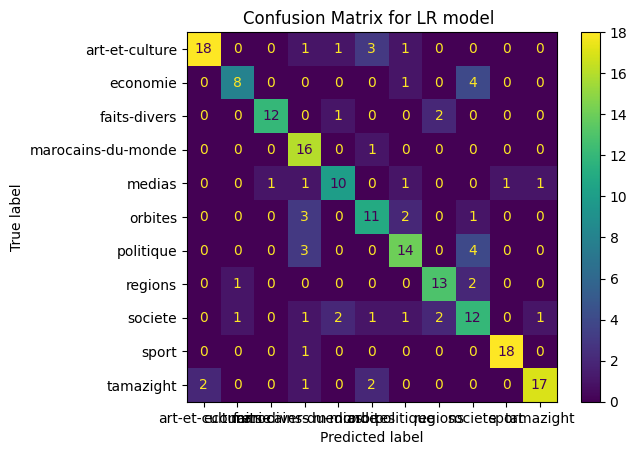

In [56]:
LR_cm = confusion_matrix(y_test, y_pred_decoded)
display = ConfusionMatrixDisplay(LR_cm,display_labels=label_encoder.classes_).plot()
plt.title(f"Confusion Matrix for LR model ")
plt.show()


In [57]:
print(classification_report(y_test, y_pred_decoded)) #get the evalutions matrices for  LR

                    precision    recall  f1-score   support

    art-et-culture       0.90      0.75      0.82        24
          economie       0.80      0.62      0.70        13
      faits-divers       0.92      0.80      0.86        15
marocains-du-monde       0.59      0.94      0.73        17
            medias       0.71      0.67      0.69        15
           orbites       0.61      0.65      0.63        17
         politique       0.70      0.67      0.68        21
           regions       0.76      0.81      0.79        16
           societe       0.52      0.57      0.55        21
             sport       0.95      0.95      0.95        19
         tamazight       0.89      0.77      0.83        22

          accuracy                           0.74       200
         macro avg       0.76      0.74      0.75       200
      weighted avg       0.76      0.74      0.75       200

